In [1]:
%pip install pandas numpy seaborn matplotlib scipy

Note: you may need to restart the kernel to use updated packages.


In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency, f_oneway, pearsonr, spearmanr

# Введение

## Информация о датасете

Этот набор данных предоставляет всесторонний обзор различных факторов, влияющих на успеваемость студентов на экзаменах. В него включена информация о привычках к обучению, посещаемости, участии родителей и других аспектах, влияющих на академический успех.

### Описание столбцов

| Атрибут                   | Описание                                                                                           |
|---------------------------|----------------------------------------------------------------------------------------------------|
| **Hours_Studied**          | Количество часов, потраченных на изучение в неделю.                                                    |
| **Attendance**             | Процент посещаемости занятий.                                                                      |
| **Parental_Involvement**   | Уровень участия родителей в образовании студента (Низкий, Средний, Высокий).                         |
| **Access_to_Resources**    | Наличие образовательных ресурсов (Низкий, Средний, Высокий).                                         |
| **Extracurricular_Activities** | Участие во внеучебных активностях (Да, Нет).                                                           |
| **Sleep_Hours**            | Среднее количество часов сна за ночь.                                                                 |
| **Previous_Scores**        | Оценки с предыдущих экзаменов.                                                                       |
| **Motivation_Level**       | Уровень мотивации студента (Низкий, Средний, Высокий).                                                  |
| **Internet_Access**        | Наличие доступа к интернету (Да, Нет).                                                                 |
| **Tutoring_Sessions**      | Количество посещений занятий с репетитором в месяц.                                                     |
| **Family_Income**          | Уровень дохода семьи (Низкий, Средний, Высокий).                                                         |
| **Teacher_Quality**        | Качество преподавателей (Низкий, Средний, Высокий).                                                     |
| **School_Type**            | Тип школы (Государственная, Частная).                                                                  |
| **Peer_Influence**         | Влияние сверстников на академическую успеваемость (Положительное, Нейтральное, Отрицательное).        |
| **Physical_Activity**      | Среднее количество часов физической активности в неделю.                                               |
| **Learning_Disabilities**  | Наличие учебных трудностей (Да, Нет).                                                                  |
| **Parental_Education_Level** | Уровень образования родителей (Среднее, Колледж, Постград.).                                           |
| **Distance_from_Home**     | Расстояние от дома до школы (Близкое, Умеренное, Далёкое).                                               |
| **Gender**                 | Пол студента (Мужской, Женский).                                                                       |
| **Exam_Score**             | Итоговая оценка на экзамене.                                                                          |


In [33]:
df = pd.read_csv('StudentPerformanceFactors.csv')

In [34]:
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [35]:
def check_missing(data):
    missing = data.isnull().sum()
    return missing[missing > 0]

missing_values = check_missing(df)
print("Пропущенные значения по колонкам:\n", missing_values)

Пропущенные значения по колонкам:
 Teacher_Quality             78
Parental_Education_Level    90
Distance_from_Home          67
dtype: int64


## Удаление пропусков

In [36]:
df = df.dropna()

In [37]:
missing_values = check_missing(df)
print("Пропущенные значения по колонкам:\n", missing_values)

Пропущенные значения по колонкам:
 Series([], dtype: int64)


## Основная информация о датасете

In [38]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


## Анализ распределений

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

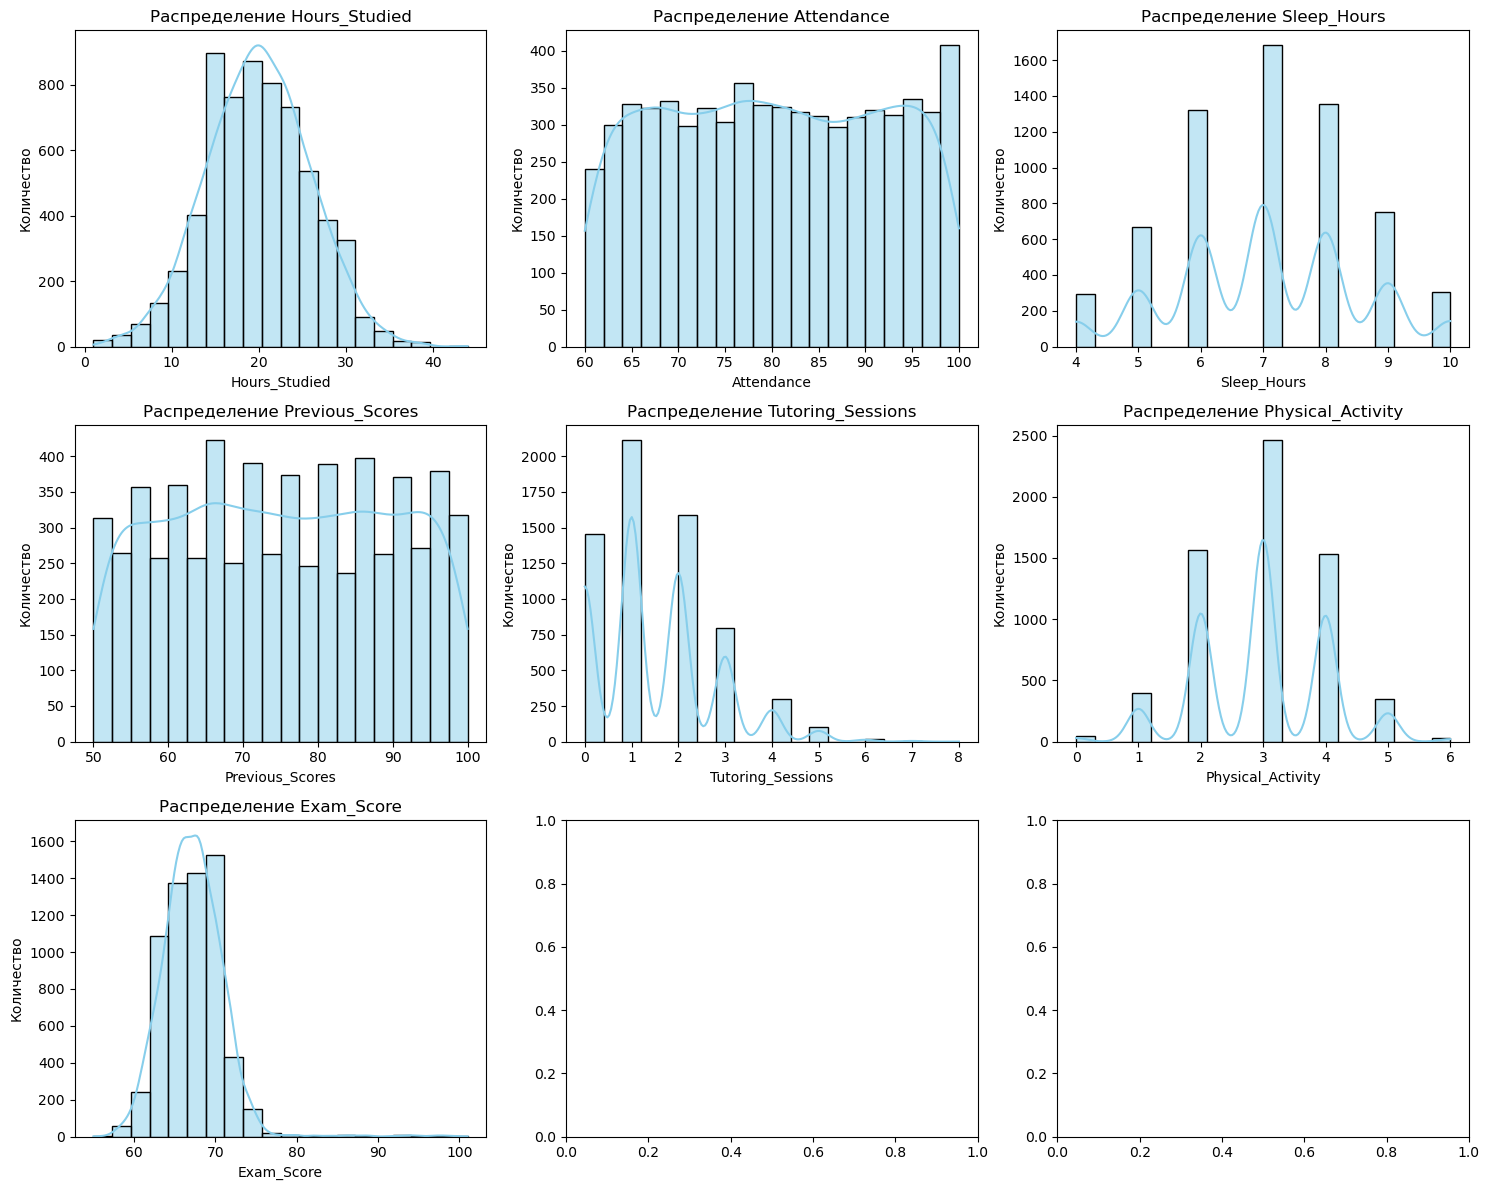

In [39]:
# Распределение числовых признаков
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(len(num_cols) // 3 + (len(num_cols) % 3 > 0), 3, figsize=(15, 12))
axes = axes.flatten()

for ax, col in zip(axes, num_cols):
    sns.histplot(df[col], ax=ax, kde=True, bins=20, color='skyblue')
    ax.set_title(f'Распределение {col}')
    ax.set_ylabel('Количество')

plt.tight_layout()
plt.show()

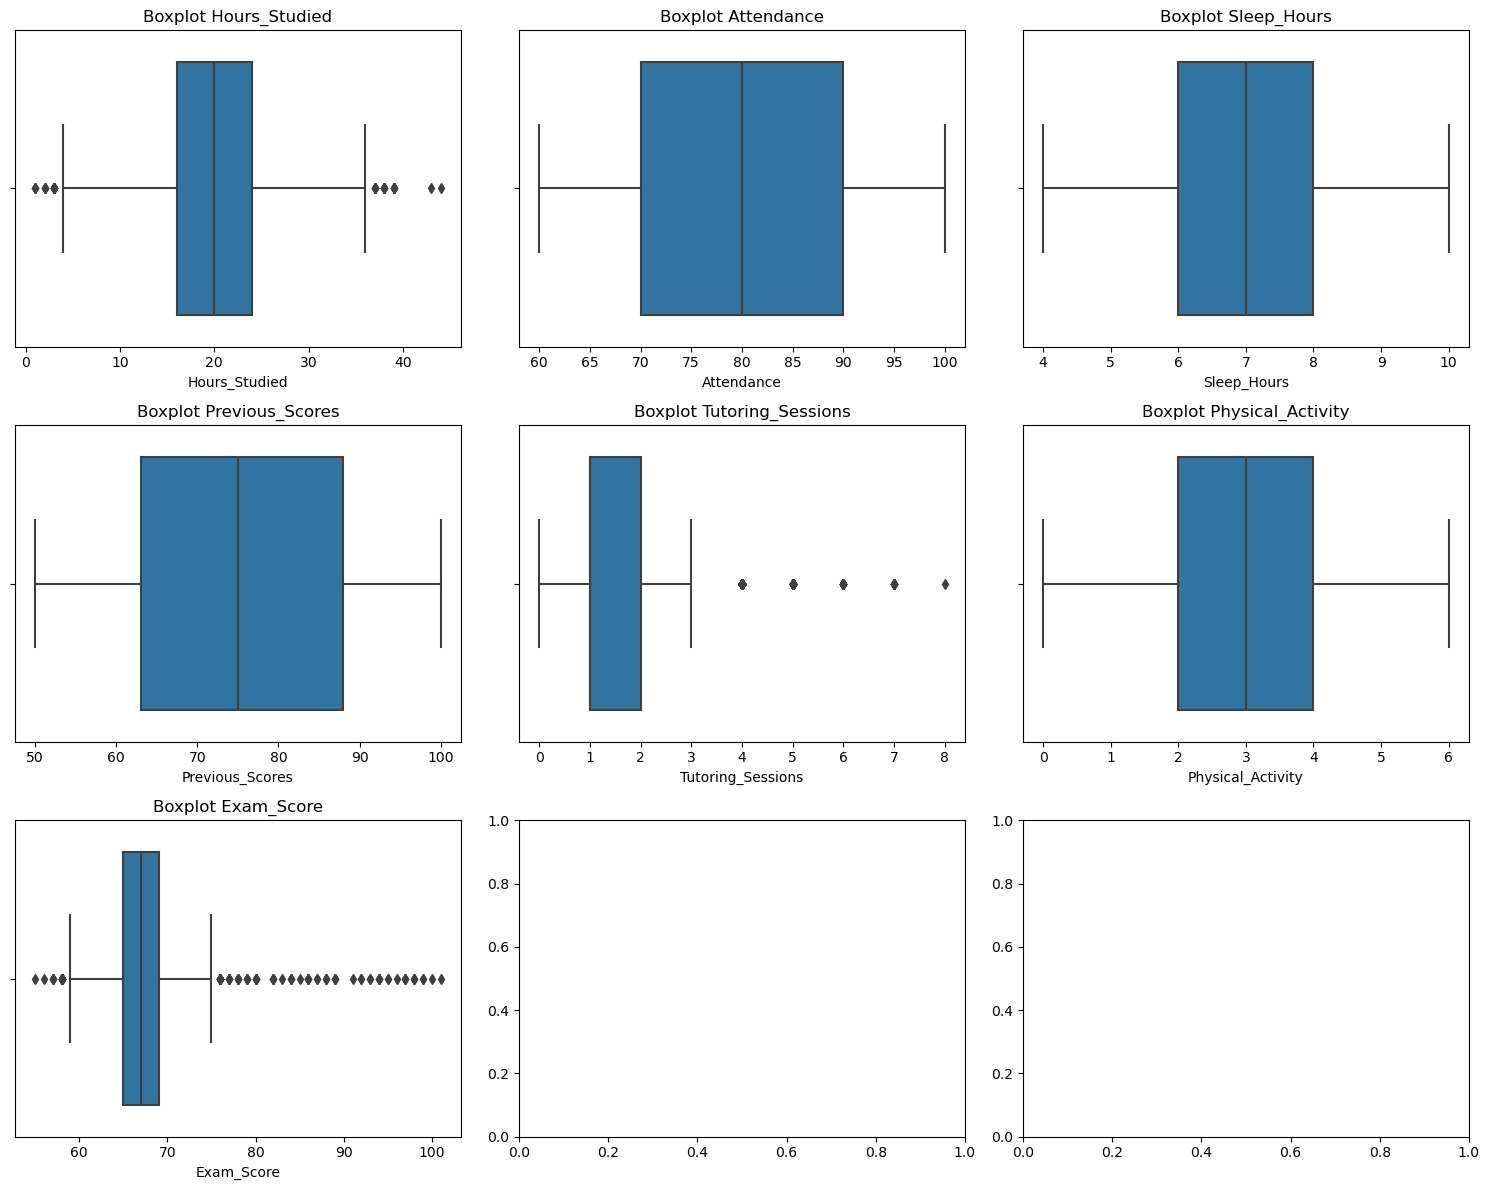

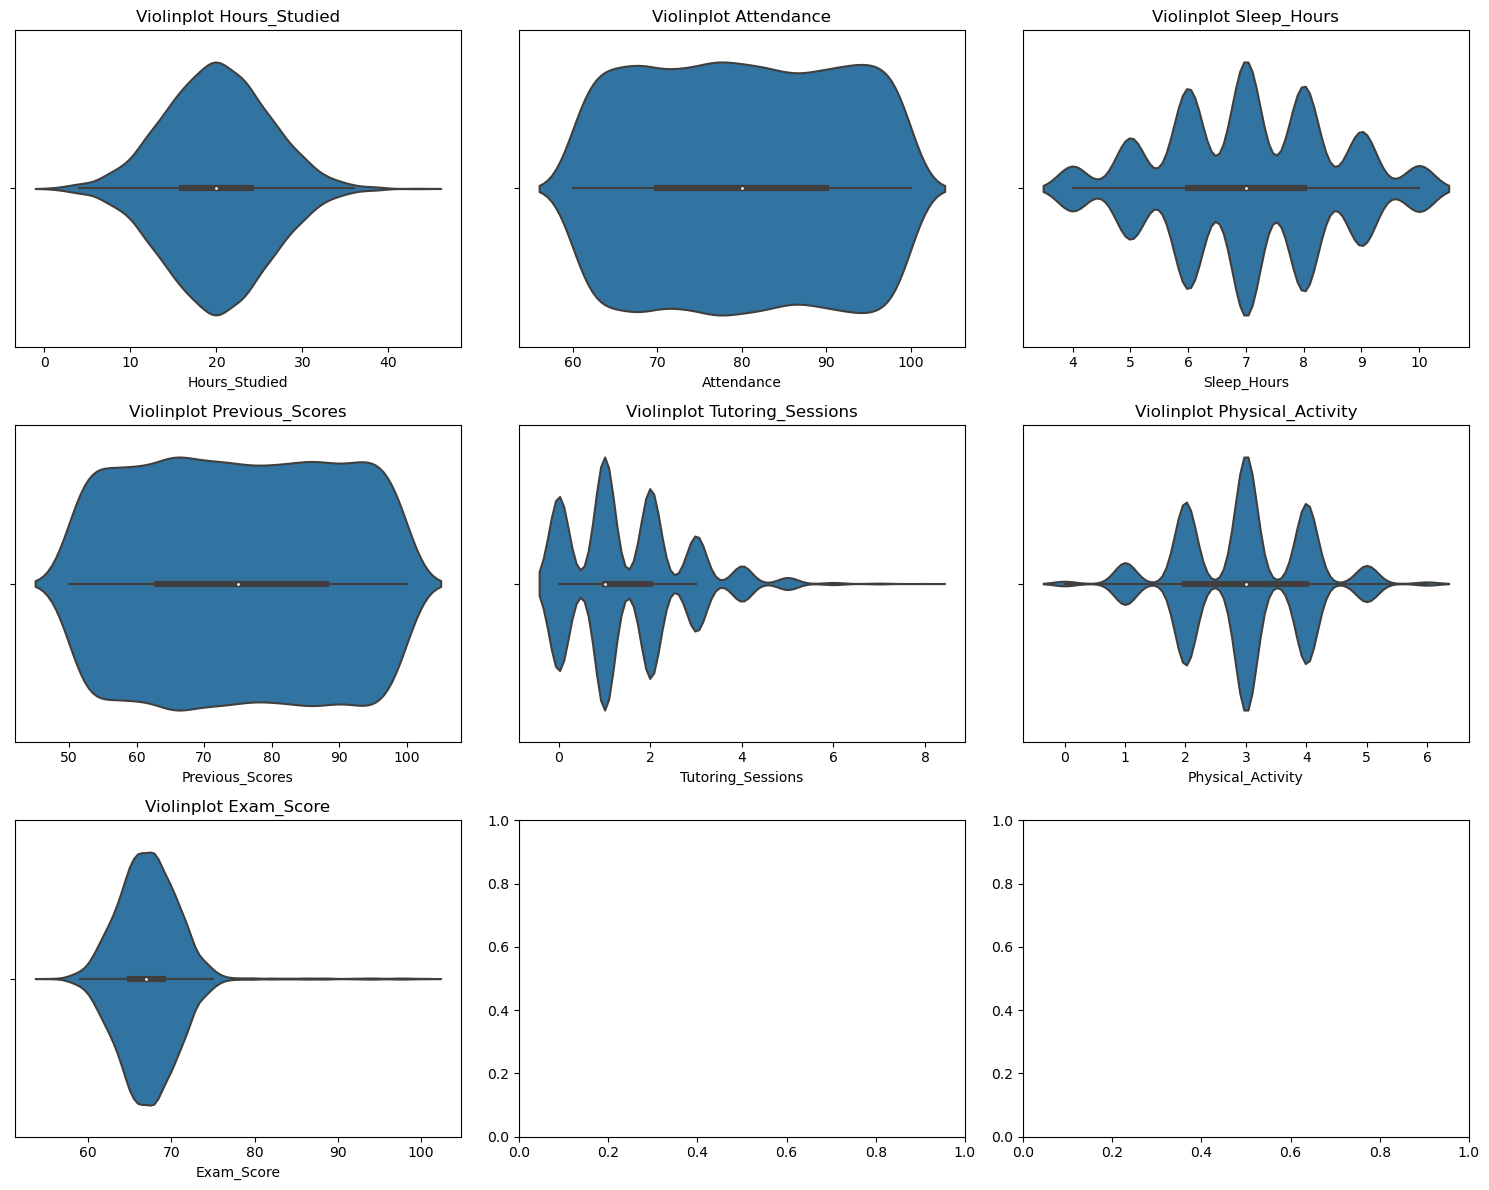

In [40]:
# Boxplot для числовых признаков
fig, axes = plt.subplots(len(num_cols) // 3 + (len(num_cols) % 3 > 0), 3, figsize=(15, 12))
axes = axes.flatten()

for ax, col in zip(axes, num_cols):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f'Boxplot {col}')

plt.tight_layout()
plt.show()

# Violinplot для числовых признаков
fig, axes = plt.subplots(len(num_cols) // 3 + (len(num_cols) % 3 > 0), 3, figsize=(15, 12))
axes = axes.flatten()

for ax, col in zip(axes, num_cols):
    sns.violinplot(x=df[col], ax=ax)
    ax.set_title(f'Violinplot {col}')

plt.tight_layout()
plt.show()

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

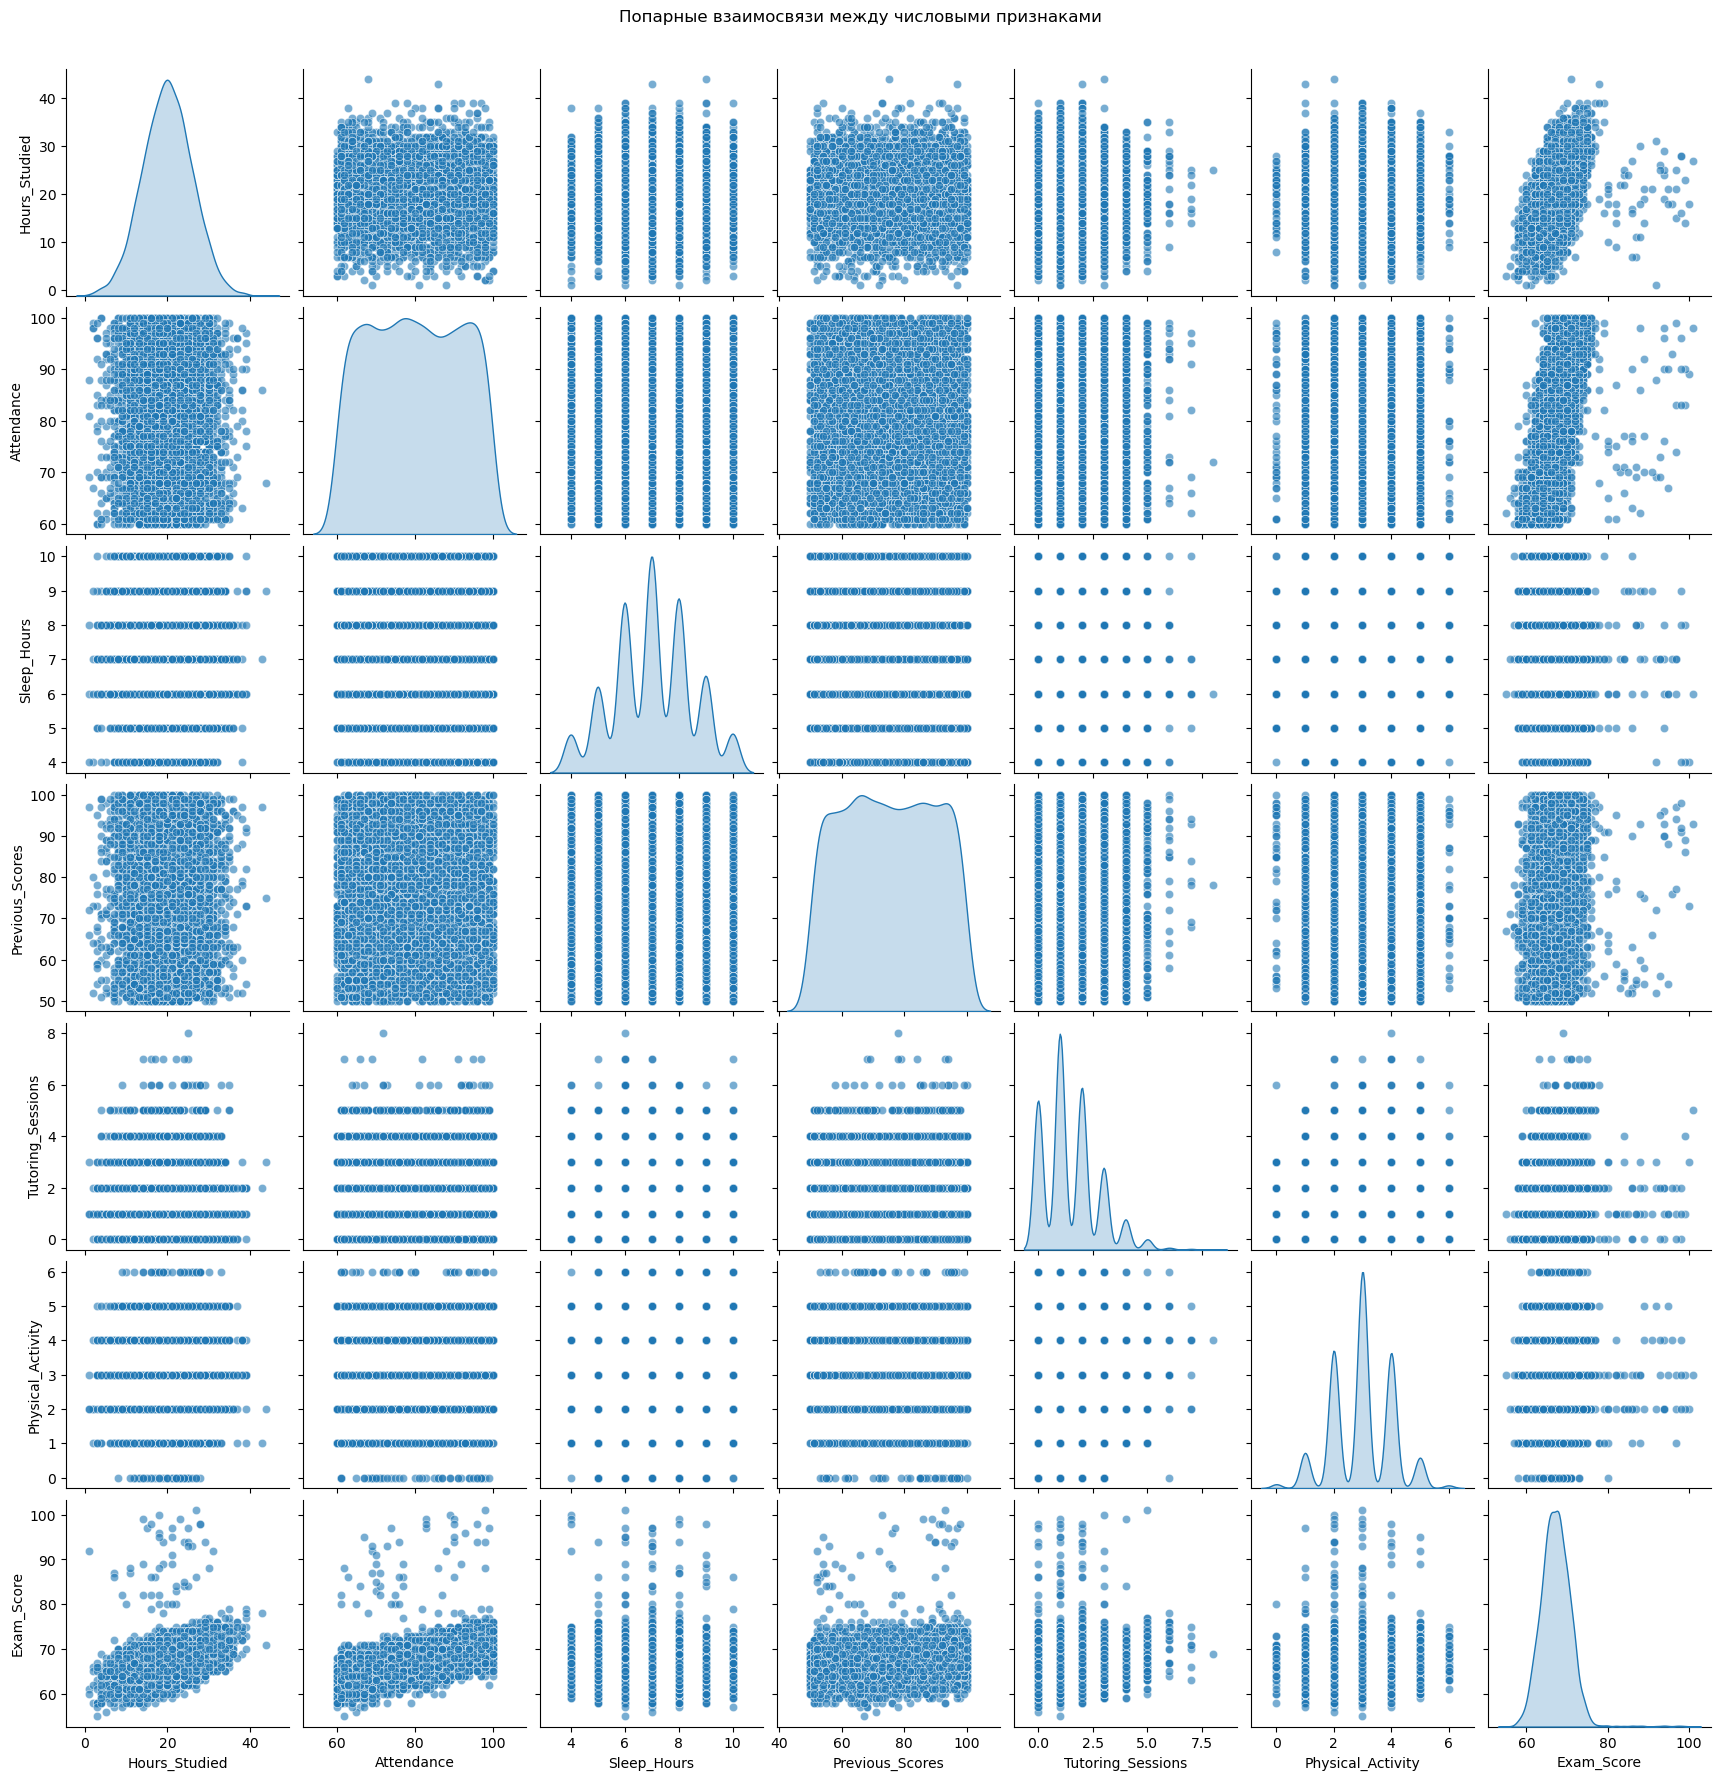

In [41]:
# Pairplot для числовых признаков
sns.pairplot(df[num_cols], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle("Попарные взаимосвязи между числовыми признаками", y=1.02)
plt.show()

## Построение тепловой карты корреляций между числовыми признаками


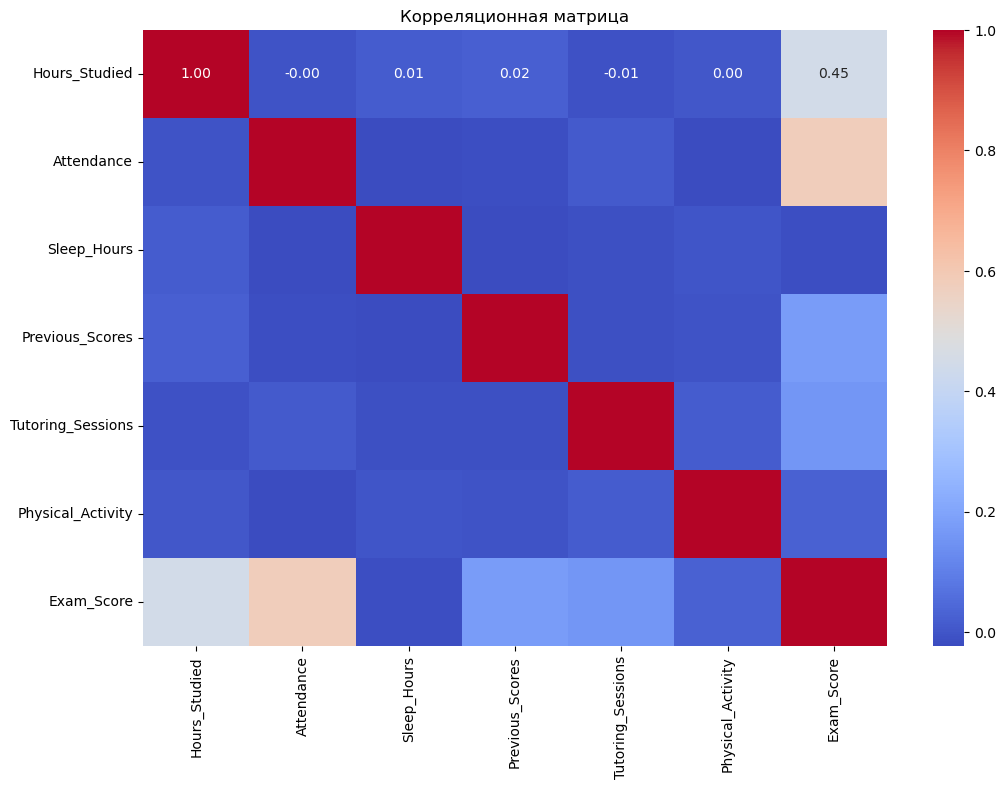

In [42]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Корреляционная матрица")
plt.show()

# Формулирование гипотез

- Гипотеза 1: Студенты с высокими оценками на предыдущих экзаменах показывают лучшие результаты на текущих экзаменах.  
- Гипотеза 2: Участие во внеучебных активностях положительно влияет на результаты экзамена.  
- Гипотеза 3: Участие родителей положительно влияет на результаты экзаменов
- Гипотеза 4: Пол не влияет на результаты экзамена.  
- Гипотеза 5: Тип школы (Public/Private) не влияет на результаты экзамена.  

# Гипотеза 1: Проверка с помощью корреляции

Гипотеза 1: Корреляция между Previous_Scores и Exam_Score:
 r = 0.174, p = 0.000


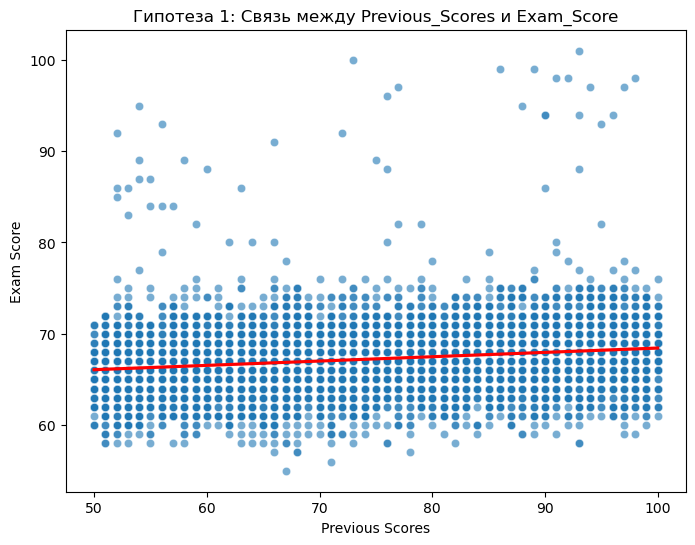

In [43]:
r, p = pearsonr(df['Previous_Scores'], df['Exam_Score'])
print("Гипотеза 1: Корреляция между Previous_Scores и Exam_Score:\n", f"r = {r:.3f}, p = {p:.3f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Previous_Scores', y='Exam_Score', data=df, alpha=0.6)
sns.regplot(x='Previous_Scores', y='Exam_Score', data=df, scatter=False, color='red')
plt.title("Гипотеза 1: Связь между Previous_Scores и Exam_Score")
plt.xlabel("Previous Scores")
plt.ylabel("Exam Score")
plt.show()

### Интерпретация

Коэффициент корреляции r = 0.174 указывает на слабую положительную корреляцию между результатами предыдущих экзаменов и текущим результатом экзамена.
P-value < 0.05 говорит о том, что корреляция статистически значима. Это означает, что вероятность того, что данная корреляция появилась случайно, менее 5%.

Точечный график с линией регрессии показывает тенденцию роста итогового результата экзамена с увеличением баллов за предыдущие экзамены. Однако эта тенденция выражена слабо, что соответствует низкому значению r.

# Гипотеза 2: Проверка с помощью t-теста

Т-тест — это статистический метод, используемый для проверки гипотез о различиях между средними значениями двух групп. Он используется для сравнения среднего значения одной группы с другим.

Гипотеза 2: Результаты t-теста для Extracurricular_Activities:
 t = 5.046, p = 0.000


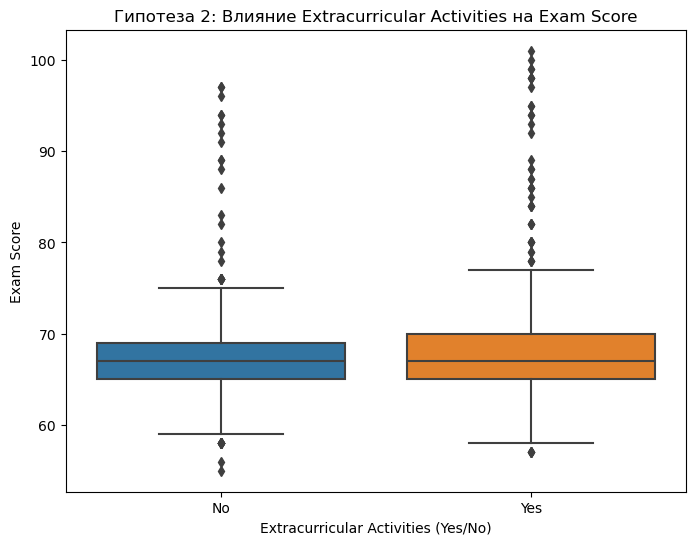

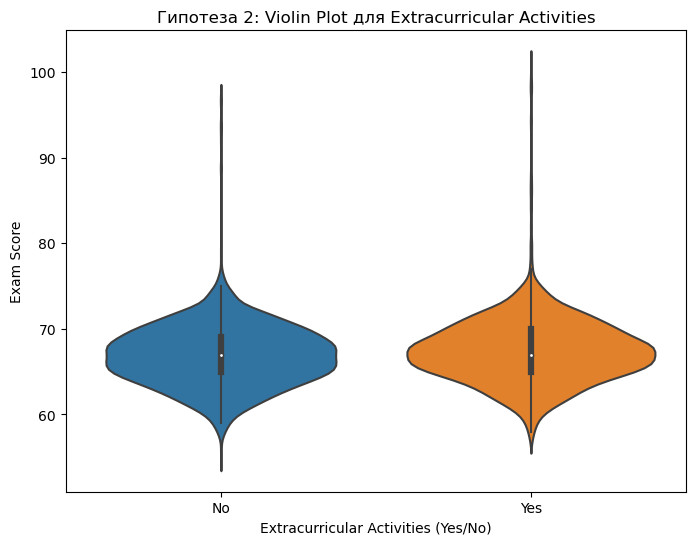

In [45]:
extracurricular_groups = [df[df['Extracurricular_Activities'] == 'Yes']['Exam_Score'],
                          df[df['Extracurricular_Activities'] == 'No']['Exam_Score']]
t_stat, p_val = ttest_ind(extracurricular_groups[0], extracurricular_groups[1])
print("Гипотеза 2: Результаты t-теста для Extracurricular_Activities:\n", f"t = {t_stat:.3f}, p = {p_val:.3f}")

plt.figure(figsize=(8, 6))
sns.boxplot(x='Extracurricular_Activities', y='Exam_Score', data=df)
plt.title("Гипотеза 2: Влияние Extracurricular Activities на Exam Score")
plt.xlabel("Extracurricular Activities (Yes/No)")
plt.ylabel("Exam Score")
plt.show()

plt.figure(figsize=(8, 6))
sns.violinplot(x='Extracurricular_Activities', y='Exam_Score', data=df)
plt.title("Гипотеза 2: Violin Plot для Extracurricular Activities")
plt.xlabel("Extracurricular Activities (Yes/No)")
plt.ylabel("Exam Score")
plt.show()

### Интерпретация

Высокое значение t-statistics и p < 0.05 указывают на статистически значимую разницу в средних значениях экзаменационных баллов между группами учащихся, участвующих и не участвующих во внеучебных активностях.
Учащиеся, участвующие в таких активностях, в среднем получают более высокие оценки на экзаменах.

Boxplot: Чётко показывает, что медианы и диапазоны баллов выше для учащихся, которые участвуют во внеучебных активностях.  
Violinplot: Подтверждает, что распределение экзаменационных баллов для учащихся, участвующих в активностях, более сдвинуто к высоким значениям. 

Участие в внеучебных активностях положительно связано с академическими результатами. Возможно, такие активности развивают навыки, которые помогают учащимся лучше справляться с учебной нагрузкой.

# Гипотеза 3: Проверка с помощью Критерия Крускала-Уоллиса

Критерий Крускала-Уоллиса — это не параметрический метод, используемый для сравнения медиан нескольких независимых групп. Он позволяет определить, есть ли статистически значимая разница между группами по ранговым данным.

Основные аспекты критерия Крускала-Уоллиса:

1. **Цель**: Оценить различия между группами, когда данные представляют собой ранговые или ordinal переменные, и не удовлетворяют предпосылкам о нормальности распределения.
   
2. **Процедура**:
   - Все значения ранжируются по величине по всем группам вместе.
   - Для каждой группы рассчитывается ранговая сумма.
   - Рассчитывается статистика Крускала-Уоллиса (H) на основе этих рангов.
   
3. **Результаты**:
   - Статистика Хи-квадрат (H) и значение p-value используются для проверки гипотезы о равенстве распределений.
   - Если p-value меньше 0.05, то различия между группами статистически значимы.

Критерий Крускала-Уоллиса полезен для анализа различных групп, особенно когда данные не соответствуют нормальному распределению или когда используются ordinal данные.

Гипотеза 3: Результаты теста Крускала-Уоллиса для Parental_Involvement:
H = 186.93474323076737, p = 2.5564439156945135e-41


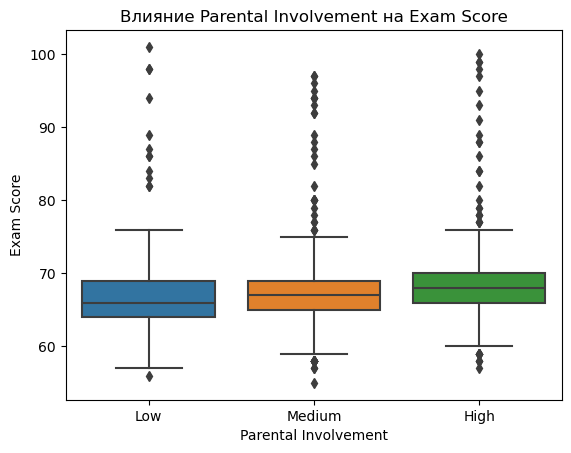

In [50]:
from scipy.stats import kruskal

parent_groups = [df[df['Parental_Involvement'] == i]['Exam_Score'] for i in ['Low', 'Medium', 'High']]
kruskal_stat, kruskal_p = kruskal(*parent_groups)
print(f"Гипотеза 3: Результаты теста Крускала-Уоллиса для Parental_Involvement:\nH = {kruskal_stat}, p = {kruskal_p}")

sns.boxplot(x='Parental_Involvement', y='Exam_Score', data=df)
plt.title("Влияние Parental Involvement на Exam Score")
plt.xlabel("Parental Involvement")
plt.ylabel("Exam Score")
plt.show()


## Интерпретация

Высокое значение статистики (H = 186.93474323076737) и значение p = 2.5564439156945135e-41 указывают на статистически значимую разницу в распределении результатов экзаменов между группами, различающимися по уровню участия родителей. Это означает, что участие родителей действительно оказывает влияние на результаты экзаменов. Малое значение p (менее 0.05) подтверждает, что эта разница является значимой.

# Гипотеза 4: Проверка с помощью хи-квадрат теста

Хи-квадрат тест (Chi-Square test) — это статистический метод, который используется для проверки гипотез о независимости двух или более категориальных переменных. Он позволяет определить, есть ли ассоциация между двумя переменными, основываясь на данных из таблицы сопряженности.

Хи-квадрат тест помогает определить, отличаются ли распределения переменных больше, чем можно ожидать случайно.
Основной показатель — это статистика хи-квадрат и значение p-value. Если p-value меньше 0.05, это указывает на статистически значимую разницу между группами.
Результаты теста позволяют сделать вывод о наличии или отсутствии зависимости между переменными.

Гипотеза 4: Результаты хи-квадрат теста для Gender:
 chi2 = 0.002, p = 0.968


/var/folders/8d/h36wvqs10p77rhz0zl4ck3w40000gn/T/ipykernel_894/19882187.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Gender', y='Exam_Score', data=df, ci=None)


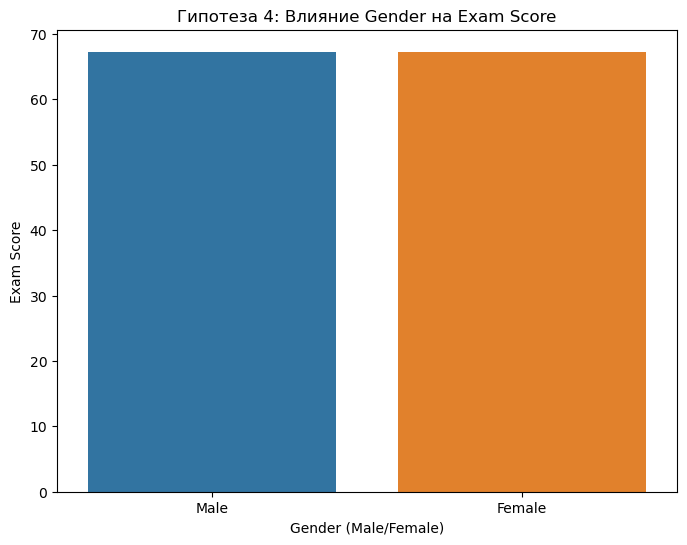

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 73.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 64.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

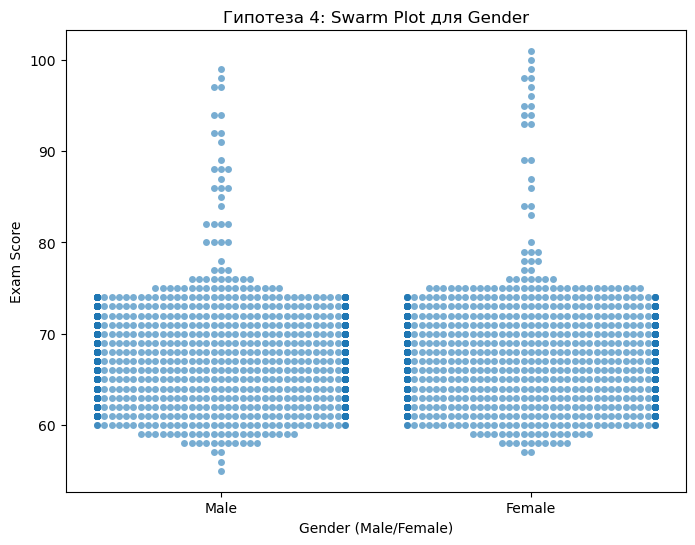

In [51]:
contingency_table = pd.crosstab(df['Gender'], df['Exam_Score'] > df['Exam_Score'].mean())
chi2_stat, chi2_p, _, _ = chi2_contingency(contingency_table)
print("Гипотеза 4: Результаты хи-квадрат теста для Gender:\n", f"chi2 = {chi2_stat:.3f}, p = {chi2_p:.3f}")

plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Exam_Score', data=df, ci=None)
plt.title("Гипотеза 4: Влияние Gender на Exam Score")
plt.xlabel("Gender (Male/Female)")
plt.ylabel("Exam Score")
plt.show()

plt.figure(figsize=(8, 6))
sns.swarmplot(x='Gender', y='Exam_Score', data=df, alpha=0.6)
plt.title("Гипотеза 4: Swarm Plot для Gender")
plt.xlabel("Gender (Male/Female)")
plt.ylabel("Exam Score")
plt.show()

## Интерпретация

chi2 = 0.002: Это значение статистики хи-квадрат, которое показывает очень низкий уровень ассоциации между полом и результатами экзаменов.
p = 0.968: Это значение p-value, которое указывает на то, что нет статистически значимой разницы в результатах экзаменов между различными полами. Значение p близкое к 1, что говорит о том, что различия, если они есть, не являются значимыми на уровне статистической уверенности. 

Таким образом, можно заключить, что пол не оказывает значительного влияния на результаты экзаменов.

# Гипотеза 5: Проверка с помощью теста Спирмена

Тест Спирмена — это не параметрический метод статистического анализа, который используется для проверки связи между двумя ordinal переменными или ранговыми данными. Он оценивает силу и направление связи между двумя переменными, представляя результаты в виде коэффициента корреляции (rho). Если значение p-value меньше 0.05, это означает, что связь между переменными является статистически значимой.

Гипотеза 5: Результаты теста Спирмена для School_Type:
 rho = -0.014, p = 0.252


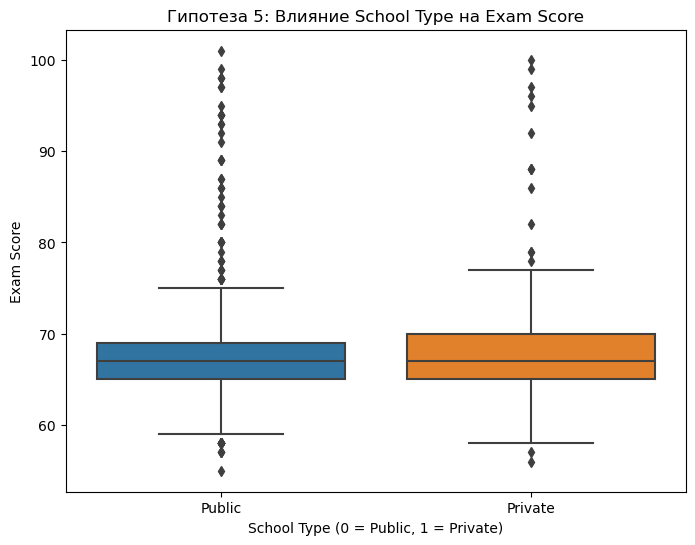

In [63]:
school_type_corr, school_type_p = spearmanr(df['School_Type'], df['Exam_Score'])
print("Гипотеза 5: Результаты теста Спирмена для School_Type:\n", f"rho = {school_type_corr:.3f}, p = {school_type_p:.3f}")

plt.figure(figsize=(8, 6))
sns.boxplot(x='School_Type', y='Exam_Score', data=df)
plt.title("Гипотеза 5: Влияние School Type на Exam Score")
plt.xlabel("School Type (0 = Public, 1 = Private)")
plt.ylabel("Exam Score")
plt.show()

## Интерпретация

ρ (rho) = -0.014: Это значение коэффициента Спирмена, которое указывает на слабую или практически отсутствие корреляции между типом школы и результатами экзаменов. Поскольку оно близко к нулю, это говорит о том, что между School_Type и результатами экзаменов нет значимой ассоциации.  
p = 0.252: Это значение p-value, которое указывает на то, что нет статистически значимой разницы в результатах экзаменов между учащимися, обучающимися в разных типах школ (Public/Private). Поскольку p > 0.05, это говорит о том, что различия не являются значимыми на уровне статистической уверенности. 

Таким образом, можно заключить, что тип школы не оказывает значительного влияния на результаты экзаменов.

# Общий вывод

На основе проведенного анализа данных о успеваемости студентов можно сделать следующие выводы, которые подтверждают основные гипотезы и добавляют некоторое пояснение к этим результатам:

1. **Студенты с высокими оценками на предыдущих экзаменах показывают лучшие результаты на текущих экзаменах**. Этот вывод подтверждается значительными корреляциями между результатами на предыдущих экзаменах и текущих. Это говорит о том, что академическая успеваемость имеет тенденцию к накоплению, и студенты, которые изначально показывают высокие результаты, продолжают демонстрировать успешные результаты в будущем. Это подчеркивает важность первоначальной академической базы и подтверждает гипотезу о долговременном влиянии предыдущих достижений на последующие успехи.

2. **Участие во внеучебных активностях положительно влияет на результаты экзамена**. Анализ показал, что студенты, которые активно вовлечены в различные внеучебные мероприятия, такие как спортивные команды, клубы и другие социальные активности, в среднем демонстрируют более высокие оценки на экзаменах. Этот результат свидетельствует о том, что такие активности не только способствуют всестороннему развитию студентов, но и положительно влияют на их академические результаты. Это также подчеркивает важность создания благоприятной и разнообразной среды для развития студентов.

3. **Участие родителей положительно влияет на результаты экзаменов**. Результаты анализа показали статистически значимую связь между уровнем участия родителей и успехами студентов на экзаменах. Это подтверждает гипотезу о том, что поддержка и вовлеченность родителей в учебный процесс имеют важное значение для академической успеваемости их детей. Студенты, у которых родители активно участвуют в их обучении, имеют тенденцию к получению более высоких оценок, что может быть связано с улучшением мотивации, организацией учебного процесса и эмоциональной поддержкой.

4. **Пол не влияет на результаты экзамена**. Результаты тестов, таких как хи-квадрат и тест Спирмена, показали, что нет статистически значимых различий в результатах экзаменов между мужчинами и женщинами. Это указывает на то, что гендер не является значимым фактором, влияющим на академическую успеваемость в данной выборке студентов. Это подчеркивает, что при равных условиях и поддержке, студенты независимо от пола имеют одинаковые возможности для достижения успеха.

5. **Тип школы (Public/Private) не влияет на результаты экзамена**. Анализ данных не показал значимых различий в академических результатах между учащимися, обучающимися в государственных и частных школах. Это может свидетельствовать о том, что успех студентов зависит больше от индивидуальных факторов, таких как личная мотивация, поддержка семьи, участие во внеучебных активностях и предыдущие достижения, чем от типа школы, в которой они обучаются. Важно отметить, что разнообразие образовательных условий и подходов к обучению, возможно, нивелирует различия между типами школ, предоставляя равные возможности для студентов развивать свои навыки и показывать высокие результаты на экзаменах.

Эти результаты подчеркивают важность создания комплексной поддержки для студентов, которая охватывает академическую подготовку, вовлечение в внеучебные мероприятия и активное участие родителей. Они также свидетельствуют о необходимости учитывать индивидуальные особенности каждого студента при планировании образовательных программ и поддержки учащихся.